In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
p = pd.read_excel("./input/연령별인구현황_2020.xlsx", skiprows=4)
list = p.iloc[:, 3]
data = []
for i in range(len(p)):
    num = list.iloc[i].replace(",", "")
    data.append(int(num))
data[5]+=data[7]
del data[7]
data

c:\Users\dawoo\anaconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


[7231209,
 2461682,
 1751119,
 2171715,
 1033715,
 1307986,
 838950,
 9782084,
 1080135,
 1132221,
 1459144,
 1224104,
 1232578,
 1827700,
 2359396,
 469839]

In [31]:
satisfied = pd.read_excel("./input/2020/근로_환경_만족도_2020.xlsx")
satisfied = satisfied.drop(columns="특성별(1)", axis=1)
satisfied = satisfied.set_index("특성별(2)")

satisfied_1 = satisfied.iloc[10:27, -4]
satisfied_2 = satisfied.iloc[10:27, -3]

total_list = []
for i in range(len(satisfied_1)):
    total = satisfied_1.iloc[i]+satisfied_2.iloc[i]
    total_list.append(total)
# 311 49
total_list[5]+=total_list[7]
del total_list[7]

# satisfied_1
# satisfied_2

print(total_list)

[14.9, 15.4, 19.3, 18.4, 17.1, 36.2, 16.8, 17.1, 17.6, 19.7, 16.8, 18.200000000000003, 16.599999999999998, 19.8, 17.8, 21.599999999999998]


In [32]:
# local_people = pd.read_excel("./output/지역별_퇴사자3.xlsx")
# local_people = local_people.iloc[:, [0, -9, -8, -7]]
# local_people = local_people.rename(
#     columns={"2020.1": "경력", "2020.2": "입사경험", "2020.3": "신입"})
# local_people = local_people.drop(index=0)
# list = local_people.iloc[1:, 3]
# new = []
# for i in range(len(list)):
#     num_str = list.iloc[i].replace(",", "")
#     # print(num_str)
#     new.append(int(num_str))
# new

In [33]:
local_people_2020 = pd.read_excel("./output/지역별_퇴사자3.xlsx")
local_people_2020 = local_people_2020.iloc[:, [0, -9, -8, -7]]
local_people_2020 = local_people_2020.rename(
    columns={"2020.1": "경력", "2020.2": "입사경험", "2020.3": "신입"})
local_people_2020 = local_people_2020.drop(index=0)
list = local_people_2020.iloc[1:, 3]
new_2020 = []
for i in range(len(list)):
    num_str = list.iloc[i].replace(",", "")
    # print(num_str)
    new_2020.append(int(num_str)/data[i]*100)
new_2020

[0.10371709626979389,
 0.07519249033790718,
 0.09513916529944567,
 0.1623141158024879,
 0.0198313848594632,
 0.15000160552177164,
 0.22575838846176768,
 0.12241767705122956,
 0.046383091002513574,
 0.2807755729667618,
 0.23534346164600617,
 0.08299948370399901,
 0.05273499932661463,
 0.03912020572303988,
 0.35966832189255216,
 0.015750076089894625]

In [39]:

df_not_satisfied = pd.DataFrame({"불만족": total_list, "신입_퇴사자": new_2020})

correlation = df_not_satisfied["불만족"].corr(df_not_satisfied["신입_퇴사자"])
print(correlation)
df_not_satisfied

0.02716109794371827


,불만족,신입_퇴사자
0,14.9,0.103717
1,15.4,0.075192
2,19.3,0.095139
3,18.4,0.162314
4,17.1,0.019831
5,36.2,0.150002
6,16.8,0.225758
7,17.1,0.122418
8,17.6,0.046383
9,19.7,0.280776


In [35]:
# import statsmodels.api as sm
# mean = int(pd.Series(new).mean()+0.5)
# df_high = pd.DataFrame({"불만족": total_list, "신입_퇴사자": new})
# df_high["퇴사율"] = (df_high["신입_퇴사자"] > mean).astype(int)
#
# X = df_high['불만족']
# X = sm.add_constant(X)
# Y = df_high['퇴사율']

# model = sm.OLS(Y, X).fit()

# print(model.summary())

<Axes: xlabel='불만족', ylabel='신입_퇴사자'>

c:\Users\dawoo\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
c:\Users\dawoo\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


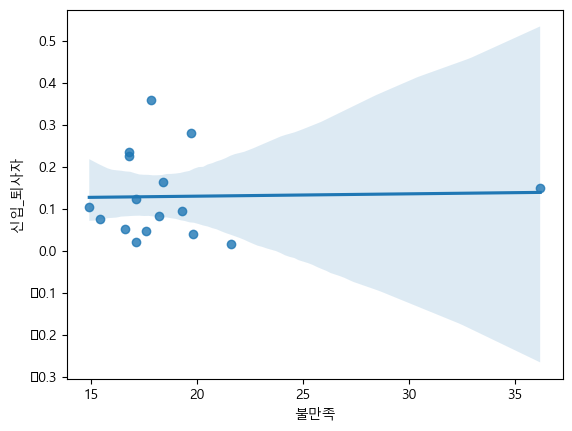

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
font_path = "C:/Windows/Fonts/malgun.ttf"
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rc("font", family=font_name)
sns.regplot(x=df_not_satisfied['불만족'], y=df_not_satisfied['신입_퇴사자'])

<Axes: >

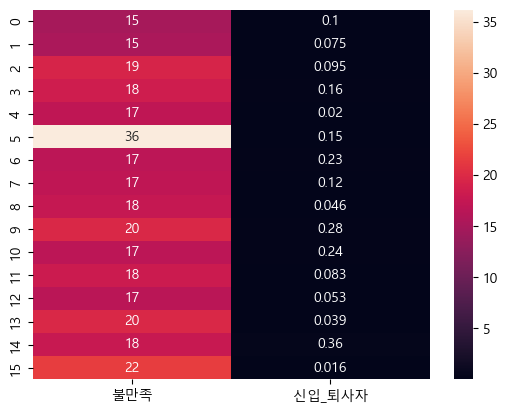

In [37]:
df = pd.DataFrame({"불만족": total_list, "신입_퇴사자": new})
sns.heatmap(data=df, annot=True)